In [1]:
#adding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# importing the data
SH = pd.read_csv('train.csv')
SH.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# checking the shape of the dataframe
SH.shape

(1460, 81)

In [4]:
# checking the datatypes and null values
SH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#describing the dataframe
SH.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
# checking the missing values
round(SH.isnull().sum()/len(SH.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Data Cleaning and Visualization

Checking the skewness of the features by renaming the NA to proper category

As we can see from the above missing values these are the features have the maximum missing values
Alley, FireplaceQu, PoolQC, Fence, MiscFeature

In [7]:
# From the data sheet we can see that, for the feature Alley with NA means no alley access, so we can replace NA - No alley access
SH['Alley'].replace({np.nan:'No alley access'},inplace=True)
SH['Alley'].value_counts(normalize=True)

No alley access    0.937671
Grvl               0.034247
Pave               0.028082
Name: Alley, dtype: float64

In [8]:
# Replacing the nan with No Fireplace values
SH['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
SH['FireplaceQu'].value_counts(normalize=True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Fa              0.022603
Ex              0.016438
Po              0.013699
Name: FireplaceQu, dtype: float64

In [9]:
# Replacing the nan with no pool values
SH['PoolQC'].replace({np.nan:'No Pool'},inplace=True)
SH['PoolQC'].value_counts(normalize=True)

No Pool    0.995205
Gd         0.002055
Fa         0.001370
Ex         0.001370
Name: PoolQC, dtype: float64

In [10]:
# Checking the category
SH['Fence'].value_counts(normalize=True)

MnPrv    0.558719
GdPrv    0.209964
GdWo     0.192171
MnWw     0.039146
Name: Fence, dtype: float64

In [11]:
#Replacing the nan with no fence
SH['Fence'].replace({np.nan:'No Fence'},inplace=True)
SH['Fence'].value_counts(normalize=True)

No Fence    0.807534
MnPrv       0.107534
GdPrv       0.040411
GdWo        0.036986
MnWw        0.007534
Name: Fence, dtype: float64

In [12]:
# Checking the null values
SH.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
# Replacing the nan with none values
SH['MiscFeature'].replace({np.nan:'None'},inplace=True)
SH['MiscFeature'].value_counts(normalize=True)

None    0.963014
Shed    0.033562
Othr    0.001370
Gar2    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

As we see from the above 5 features namely: `Alley, FirePlaceQu, PoolQC, Fence and MiscFeature`. 
`Alley, PoolQC and MiscFeature` - These 3 features skewed very highly so it is better to drop them out from the data frame, Fence feature would be useful for the target variable so keeping it

### Checking the few categorical columns for their categories 
Few mentioned at the down

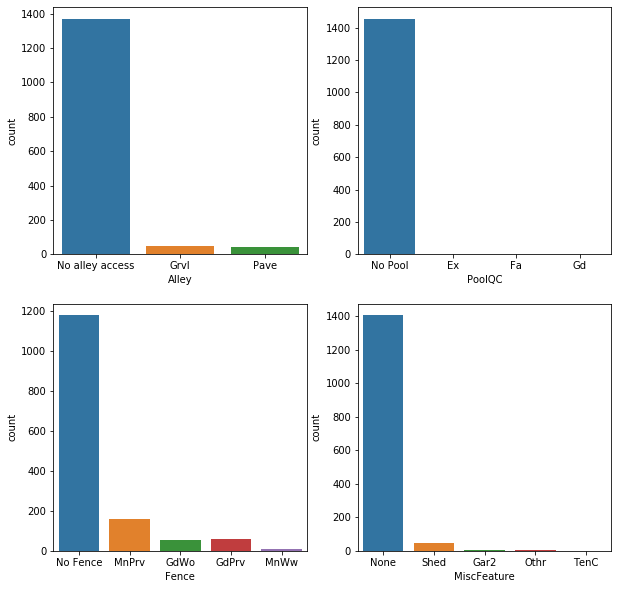

In [14]:
# Validating the skewness with the graphs for the below features
vars_NA = ['Alley', 'PoolQC', 'Fence','MiscFeature']
plt.figure(figsize=[10,10])
for i in enumerate(vars_NA):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(x=SH[i[1]],data=SH)

In [15]:
# Dropping the same 4 features which are skewed from the data frame 
SH.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

In [16]:
# check the null values in the numerical data

SH.select_dtypes(include=['int64','float']).isnull().sum()[SH.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

As we see from the above null values `LotFrontage` has missing values, Let us check the describe this feature to check the mean and median  

***************describe*****************
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


***************Boxplot*****************


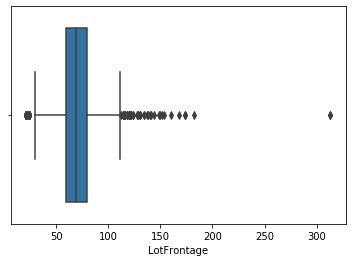

In [17]:
# Checking the describe and Boxplot of the LotFrontage feature  
print('***************describe*****************')
print(SH['LotFrontage'].describe())
print('\n')
print("***************Boxplot*****************")
sns.boxplot(x=SH['LotFrontage'])

***************describe*****************
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


***************Boxplot*****************


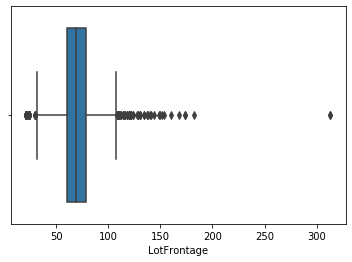

In [18]:
# replacing median value as we can see there is an outlier
SH['LotFrontage'].fillna((SH['LotFrontage']).median(),inplace=True)

# Checking the describe and Boxplot after replacing Na with mean of the feature
print('***************describe*****************')
print(SH['LotFrontage'].describe())
print('\n')
print("***************Boxplot*****************")
sns.boxplot(x=SH['LotFrontage'])

***************describe*****************
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


***************Boxplot*****************


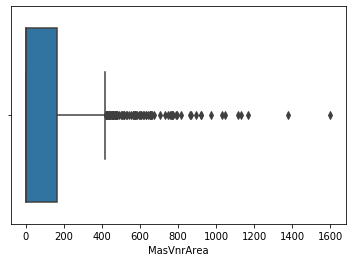

In [19]:
# Checking the describe and Boxplot of the LotFrontage feature  
print('***************describe*****************')
print(SH['MasVnrArea'].describe())
print('\n')
print("***************Boxplot*****************")
sns.boxplot(x=SH['MasVnrArea'])

***************describe*****************
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


***************Boxplot*****************


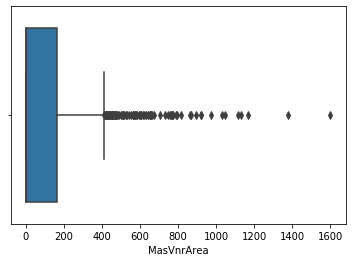

In [20]:
# replacing median value as we can see there is an outlier
SH['MasVnrArea'].fillna((SH['MasVnrArea']).median(),inplace=True)

# Checking the describe and Boxplot after replacing Na with median of the feature
print('***************describe*****************')
print(SH['MasVnrArea'].describe())
print('\n')
print("***************Boxplot*****************")
sns.boxplot(x=SH['MasVnrArea'])

In [21]:
# describing the GarageYrBlt
SH['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

***************describe*****************
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


***************Boxplot*****************


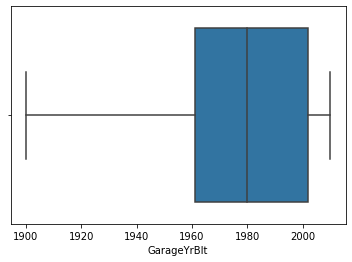

In [22]:
# Checking the describe and Boxplot of the LotFrontage feature  
print('***************describe*****************')
print(SH['GarageYrBlt'].describe())
print('\n')
print("***************Boxplot*****************")
sns.boxplot(x=SH['GarageYrBlt'])

In [23]:
#As we see there is no outlier so we can replace the null values with mean()
SH['GarageYrBlt'].fillna((SH['GarageYrBlt']).mean(),inplace=True)

In [24]:
# Checking the shape
SH.shape

(1460, 78)

### Checking the category columns

In [25]:
# checking the category
SH['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [26]:
# Replacing the null values with the top value which is highest
SH['MasVnrType'].fillna((SH['MasVnrType']).value_counts().index[0],inplace=True)

In [27]:
# Checking the categories of the MasVnrType after replacing the null values 
SH['MasVnrType'].value_counts(normalize=True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [28]:
# Replacing 'NA' with 'No Garage' for the below 4 features
for i in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    SH[i]=SH[i].fillna('No Garage')

In [29]:
# Replacing null values in 'Electrical' feature with the max value of this
SH['Electrical'].fillna((SH['Electrical']).value_counts().index[0],inplace=True)

In [30]:
# Checking for the skewness of the 'Electrical' feature 
SH['Electrical'].value_counts(normalize=True)

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

As we see from the above values there is a  skewness, it is better to drop this feature form the dataframe

In [31]:
# dropping the electrical feature
SH.drop(['Electrical'],axis=1,inplace=True)

In [32]:
# Replacing the 'NA' with the 'No Basement' on the below 5 features
Bsmt_vars = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'] 
for i in Bsmt_vars:
    SH[i]=SH[i].fillna('No Basement')

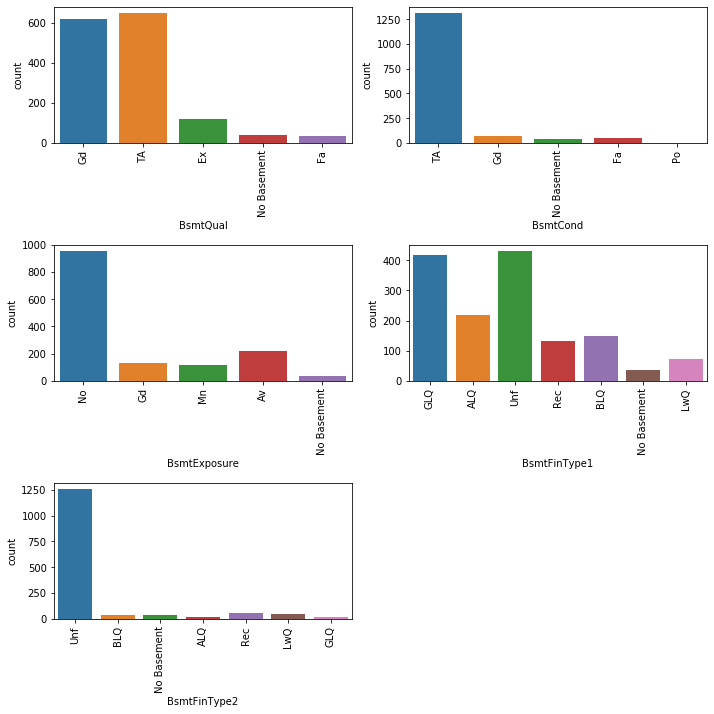

In [33]:
# Plotting the figures of the Basement variable to check their categories
plt.figure(figsize=[10,10])
for i in enumerate(Bsmt_vars):
    plt.subplot(3,2,i[0]+1)
    sns.countplot(x=SH[i[1]],data=SH)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)

In [34]:
# Dropping the columns with skewness, from the above figure
def Bsmt_vars_check():
    column = []
    for col in (Bsmt_vars):
        if(SH[col].value_counts(normalize=True).max() >= 80):
            column.append(col)
    return column

columnsToBeRemoved = Bsmt_vars_check()

# Remove the columns with skewed data

SH.drop(columnsToBeRemoved, axis = 1, inplace = True)

### Handling Year columns to calculate Age

In [35]:
# We will calculate the age of the properties 
SH['Age'] = 2020-SH['YearBuilt']

In [36]:
# As we have got the 'Age' so we can dropoff the feature 'YearBuilt'
SH.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [37]:
# dropping the categorical variables with skewness from the dataframe
def Cat_vars():
    column = []
    Cat_col = SH.select_dtypes(include=['object'])
    for col in (Cat_col):
        if(SH[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = Cat_vars()

# Remove the columns with skewed data

SH.drop(columnsToBeRemoved, axis = 1, inplace = True)

SH.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       Gd           No          GLQ         706           0        150   
1       Gd           Gd          ALQ         978           0        284   
2       Gd           Mn          GLQ         486           0        434   
3       TA           No          ALQ         216           0        540   
4       Gd           Av          GLQ         655           0        490   

   TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856        Ex       856       854             0       1710   
1         1262        Ex      1262         0             0       1262   
2          920        Ex       920       866             0       1786   
3          756        Gd       961       756             0       1717   
4         1145        Ex      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu GarageType  GarageYrBlt  \
0          Gd             8           0  No Fireplace     Attchd       2003.0   
1          TA             6           1            TA     Attchd       1976.0   
2          Gd             6           1            TA     Attchd       2001.0   
3          Gd             7           1            Gd     Detchd       1998.0   
4          Gd             9           1            TA     Attchd       2000.0   

  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          RFn           2         548           0           61   
1          RFn           2         460         298            0   
2          RFn           2         608           0           42   
3          Unf           3         642           0           35   
4          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence  MiscVal  MoSold  \
0              0          0            0         0  No Fence        0       2   
1              0          0            0         0  No Fence        0       5   
2              0          0            0         0  No Fence        0       9   
3            272          0            0         0  No Fence        0       2   
4              0    

In [38]:
# checking the percentiles
SH.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      5.575342   103.117123   443.639726    46.549315   567.240411   
std       1.112799   180.731373   456.098091   161.319273   441.866955   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000     0.000000   223.000000   
50%       5.000000     0.000000   383.500000     0.000000   477.500000   
75%       6.000000   164.250000   712.250000     0.000000   808.000000   
90%       7.000000   335.000000  1065.500000   117.200000  1232.000000   
95%       8.000000   456.000000  1274.000000   396.200000  1468.000000   
99%       9.000000   791.280000  1572.410000   830.380000  1797.050000   
max       9.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
90%    1602.200000  1680.000000   954.200000      0.000000  2158.300000   
95%    1753.000000  1831.250000  1141.050000      0.000000  2466.100000   
99%    2155.050000  2219.460000  1418.920000    360.000000  3123.480000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
95%        1.000000      1.000000     2.000000     1.000000      4.000000   
99%        2.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014  1978.506164     1.767123   
std        0.220338      1.625393     0.644666    23.994583     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%     

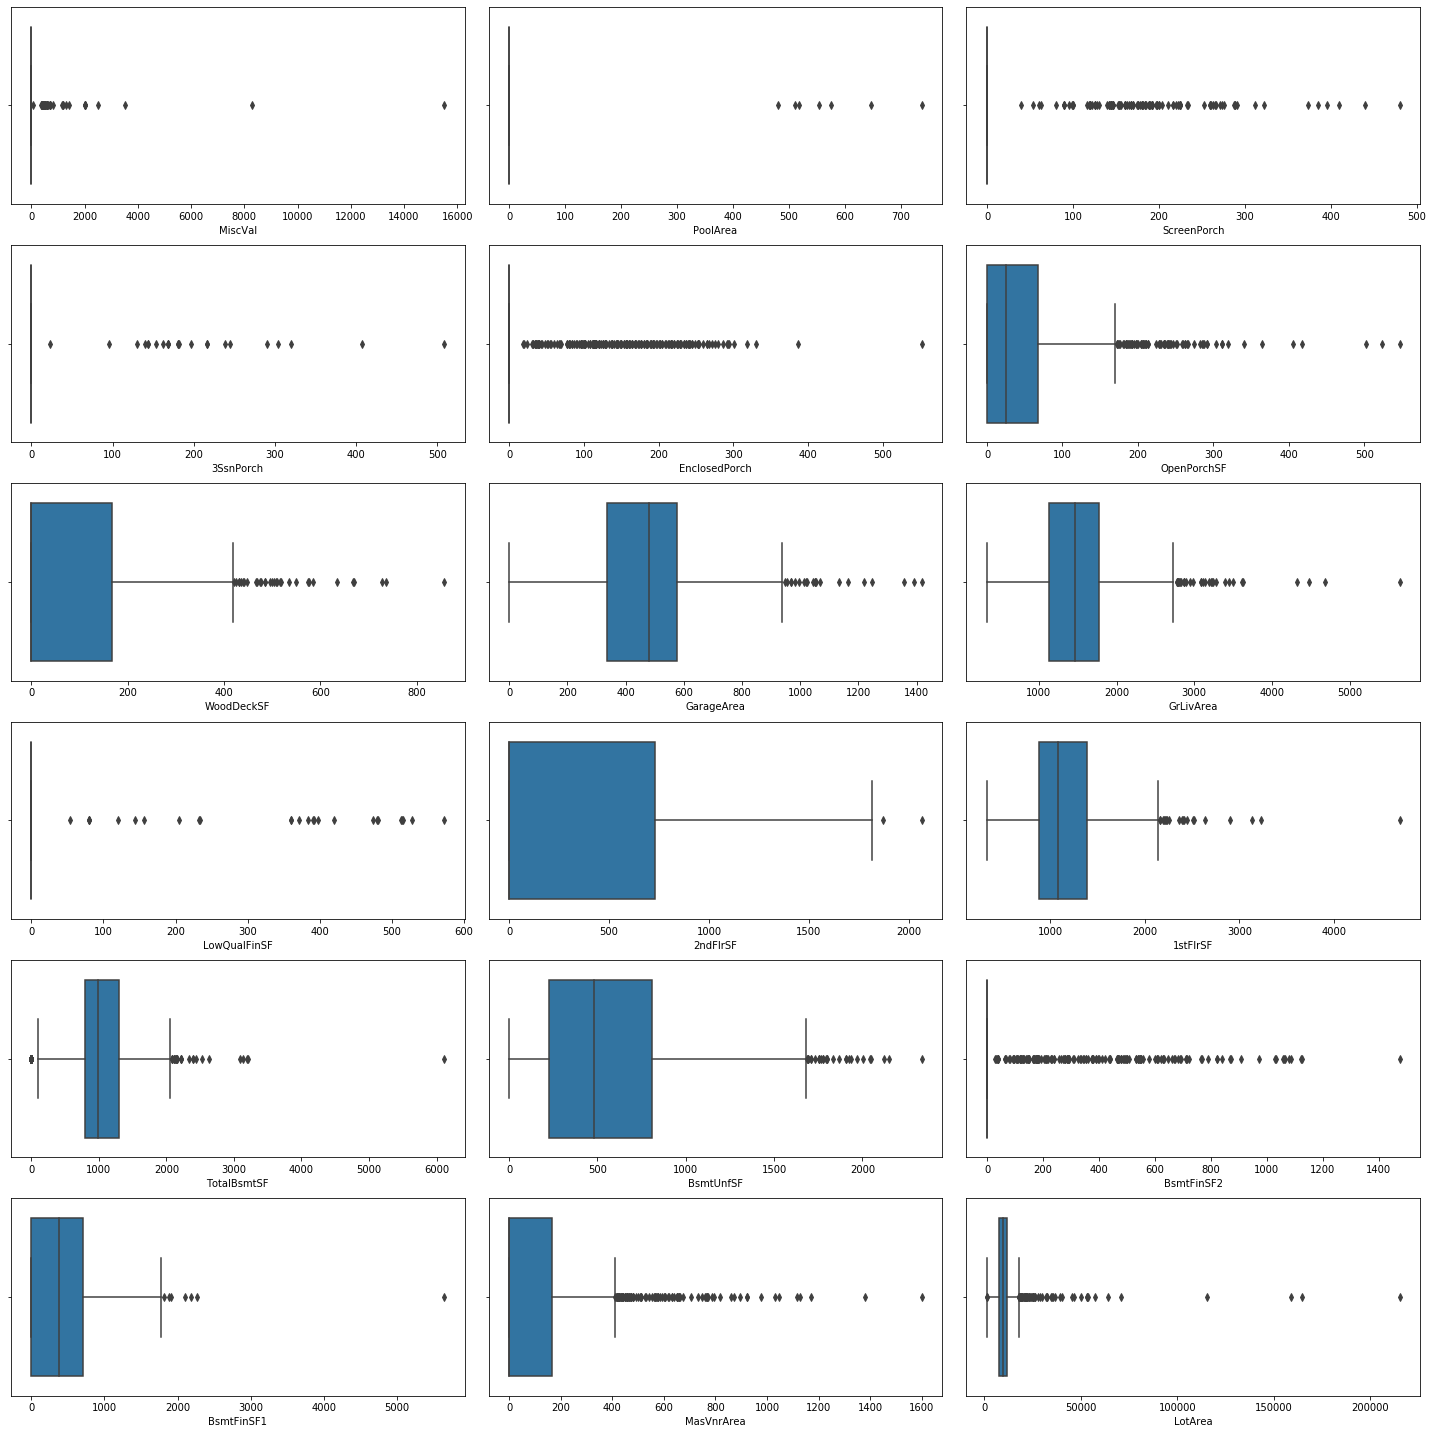

In [39]:
# Plotting Box plot for the skewed values from the describe method above and to analyse which variables can we consider further
Outlier_vars = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea','LotArea']
plt.figure(figsize=[20,20])
for i in enumerate(Outlier_vars):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(SH[i[1]])
plt.tight_layout(pad=1.0)

In [40]:
# Dropping the variables which are not explaining the feature significance 
SH.drop(['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','LowQualFinSF','BsmtFinSF2'],axis=1,inplace=True)

# As we can see we have the age of the properties, So we need not to think of months so let's drop this feature
SH.drop('MoSold',axis=1,inplace=True)

# As we can see we have the age of the properties, So we need not to think 'GarageYrBlt' so let's drop this feature
SH.drop('GarageYrBlt',axis=1,inplace=True)


In [41]:
# checking the percentiles
SH.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      5.575342   103.117123   443.639726   567.240411  1057.429452   
std       1.112799   180.731373   456.098091   441.866955   438.705324   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000   223.000000   795.750000   
50%       5.000000     0.000000   383.500000   477.500000   991.500000   
75%       6.000000   164.250000   712.250000   808.000000  1298.250000   
90%       7.000000   335.000000  1065.500000  1232.000000  1602.200000   
95%       8.000000   456.000000  1274.000000  1468.000000  1753.000000   
99%       9.000000   791.280000  1572.410000  1797.050000  2155.050000   
max       9.000000  1600.000000  5644.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean   1162.626712   346.992466  1515.463699      0.425342      0.057534   
std     386.587738   436.528436   525.480383      0.518911      0.238753   
min     334.000000     0.000000   334.000000      0.000000      0.000000   
25%     882.000000     0.000000  1129.500000      0.000000      0.000000   
50%    1087.000000     0.000000  1464.000000      0.000000      0.000000   
75%    1391.250000   728.000000  1776.750000      1.000000      0.000000   
90%    1680.000000   954.200000  2158.300000      1.000000      0.000000   
95%    1831.250000  1141.050000  2466.100000      1.000000      1.000000   
99%    2219.460000  1418.920000  3123.480000      2.000000      1.000000   
max    4692.000000  2065.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
90%       2.000000     1.000000      4.000000      1.000000      9.000000   
95%       2.000000     1.000000      4.000000      1.000000     10.000000   
99%       3.000000     1.000000      5.000000      2.000000     11.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%   

In [42]:
# Removing values beyond 98% for LotArea

LotArea_new = SH['LotArea'].quantile(0.98)
SH = SH[SH["LotArea"] < LotArea_new]

# Removing values beyond 98% for MasVnrArea

MasVnrArea_new = SH['MasVnrArea'].quantile(0.98)
SH = SH[SH["MasVnrArea"] < MasVnrArea_new]

# Removing values beyond 99% for TotalBsmtSF

TotalBsmtSF_new = SH['TotalBsmtSF'].quantile(0.99)
SH = SH[SH["TotalBsmtSF"] < TotalBsmtSF_new]

# Removing values beyond 99% for WoodDeckSF

WoodDeckSF_new = SH['WoodDeckSF'].quantile(0.99)
SH = SH[SH["WoodDeckSF"] < WoodDeckSF_new]

# Removing values beyond 99% for OpenPorchSF

OpenPorchSF_new = SH['OpenPorchSF'].quantile(0.99)
SH = SH[SH["OpenPorchSF"] < OpenPorchSF_new]

In [43]:
# describing the data frame after we cap few independent variables
SH.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1358.000000  1358.000000  1358.000000   1358.000000  1358.000000   
mean    729.169367    57.157585    68.771723   9434.943299     6.023564   
std     422.257565    42.291826    19.427951   3616.150840     1.319668   
min       1.000000    20.000000    21.000000   1300.000000     1.000000   
25%     364.250000    20.000000    60.000000   7416.250000     5.000000   
50%     729.500000    50.000000    69.000000   9246.500000     6.000000   
75%    1093.750000    70.000000    78.000000  11268.750000     7.000000   
max    1459.000000   190.000000   182.000000  25095.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count  1358.000000  1358.000000  1358.000000  1358.000000  1358.000000   
mean      5.590574    83.878498   415.770250   557.894698  1017.749632   
std       1.121361   134.061884   410.462751   429.213847   377.761875   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000   218.250000   784.000000   
50%       5.000000     0.000000   364.500000   477.500000   970.000000   
75%       6.000000   144.750000   686.000000   796.750000  1251.750000   
max       9.000000   640.000000  1646.000000  2002.000000  2006.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1358.000000  1358.000000  1358.000000   1358.000000   1358.000000   
mean   1127.438881   335.076583  1468.510309      0.408689      0.056701   
std     340.208571   420.469357   466.510415      0.510882      0.237641   
min     334.000000     0.000000   334.000000      0.000000      0.000000   
25%     865.250000     0.000000  1118.000000      0.000000      0.000000   
50%    1065.000000     0.000000  1432.000000      0.000000      0.000000   
75%    1349.750000   716.750000  1725.750000      1.000000      0.000000   
max    2898.000000  1818.000000  3608.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1358.000000  1358.000000   1358.000000   1358.000000   1358.000000   
mean      1.544919     0.369661      2.851988      1.048601      6.425626   
std       0.540722     0.500869      0.809509      0.225154      1.570732   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1358.000000  1358.000000  1358.000000  1358.000000  1358.000000   
mean      0.575847     1.729013   459.940353    84.852725    41.502946   
std       0.624770     0.737598   204.576375   108.828790    55.606136   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   312.000000     0.000000     0.000000   
50%       1.000000     2.000000   471.000000     0.000000    21.500000   
75%       1.000000     2.000000   576.000000   160.000000    63.000000   
max       3.000000     4.000000  1248.000000   468.000000   274.000000   

           SalePrice          Age  
count    1358.000000  1358.000000  
mean   173371.718704    49.156112  
std     67877.477364    30.231006  
min     35311.000000    10.000000  
25%    128500.000000    20.000000  
50%    159000.000000    48.000000  
75%    204862.500000    67.000000  
max    582933.000000   148.000000

In [44]:
# Checking the shape of the data frame
SH.shape

(1358, 49)

### Checking the target variable distribution

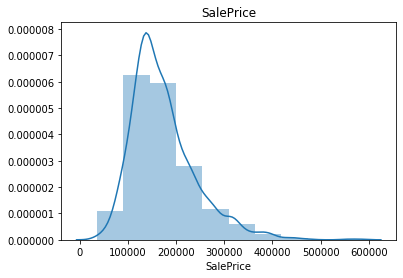

In [45]:
# Checking the target variable distribution
plt.title('SalePrice')
sns.distplot(SH['SalePrice'], bins=10)
plt.show()

### Making the target variable to be distributed normally

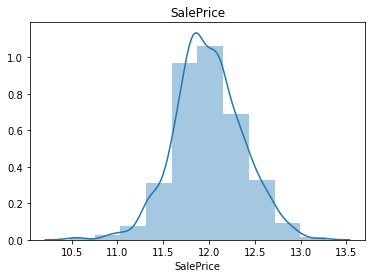

In [46]:
# Visualise the target variable -> SalePrice after transforming the sales price

SH['SalePrice'] = np.log(SH['SalePrice'])

plt.title('SalePrice')
sns.distplot(SH['SalePrice'], bins=10)
plt.show()

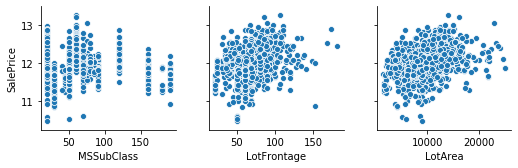

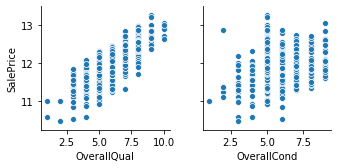

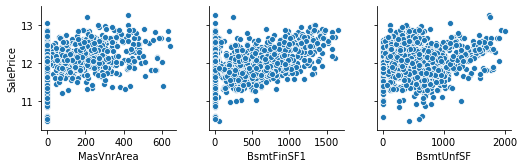

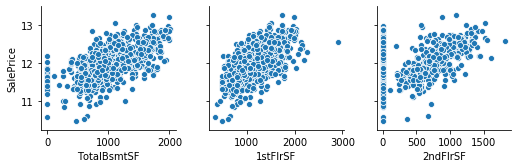

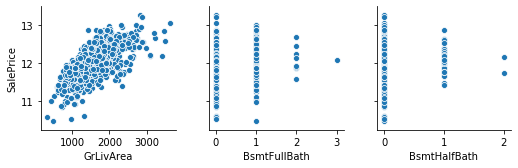

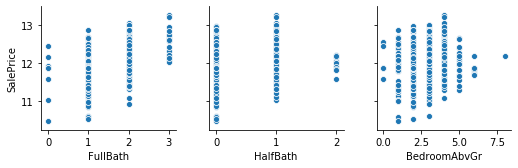

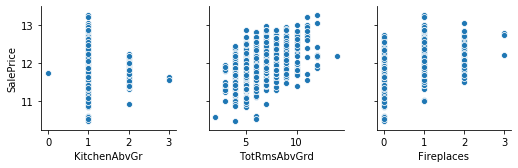

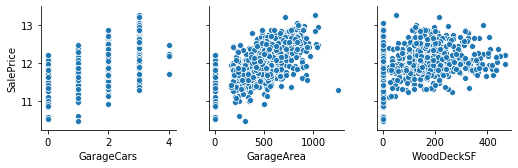

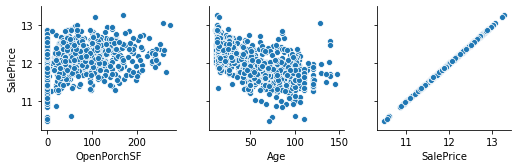

In [47]:
# Checking the numerical values against target variable using pairplot
sns.pairplot(x_vars=['MSSubClass','LotFrontage','LotArea'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['OverallQual','OverallCond'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['MasVnrArea','BsmtFinSF1','BsmtUnfSF'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['TotalBsmtSF','1stFlrSF','2ndFlrSF'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['GrLivArea','BsmtFullBath','BsmtHalfBath'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['FullBath','HalfBath','BedroomAbvGr'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['KitchenAbvGr','TotRmsAbvGrd','Fireplaces'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['GarageCars','GarageArea','WoodDeckSF'],y_vars='SalePrice',data=SH)
sns.pairplot(x_vars=['OpenPorchSF','Age','SalePrice'],y_vars='SalePrice',data=SH)
plt.show()

### Checking the correlation between varaibles

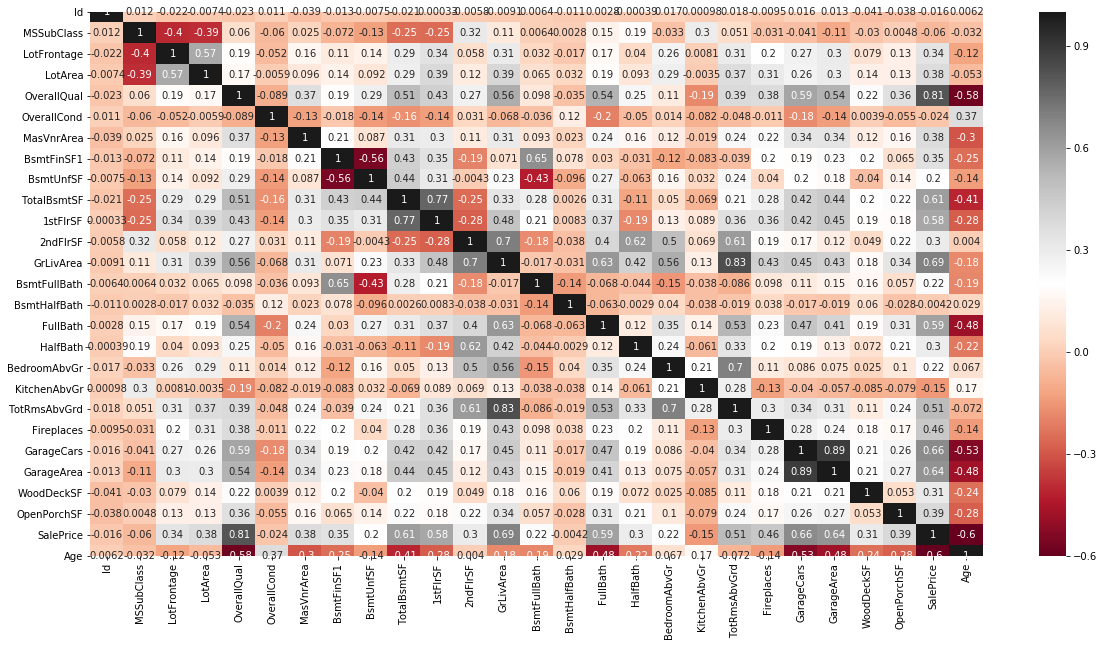

In [48]:
# Checking the correlation of numerical columns, if there is a high correlation then we will remove the correlated variable

plt.figure(figsize = (20, 10))
sns.heatmap(SH.corr(), annot = True, cmap="RdGy")
plt.show()

As from the above plot we can see the correlation between the below variables with more than 80%:
1. GrLivArea, TotRmsAbvGrd
2. GarageCars, GarageArea

In [49]:
# Dropping the variables 'GarageCars','TotRmsAbvGrd'
SH.drop(['GarageArea','TotRmsAbvGrd'],axis=1,inplace=True)

In [50]:
#checking the shape of the dataframe
SH.shape

(1358, 47)

In [51]:
# Checking the categorical columns, to categorise ordered list features and create dummies for the rest
Cat_col = SH.select_dtypes(include=['object'])
Cat_col.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

## Data Preparation

### Creating dummies for categorical data and converting the ordinal features  with values in sequence

In [52]:
# Since the values of the following features are looks like ordered list, So let's assign the values to them in sequence

# The values which can be ordered, we will give an ordered sequence value
# The values which cannot be ordered, we will categorise them into 0 and 1

SH['LotShape'] = SH['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
SH['BldgType'] = SH['BldgType'].map({'Twnhs': 4, 'TwnhsE': 3, 'Duplex': 2, '2fmCon': 1, '1Fam': 0})

SH['HouseStyle'] = SH['HouseStyle'].map({'SLvl': 7, 'SFoyer': 6, '2.5Fin': 5, '2.5Unf': 4, '2Story': 3, 
                                                                 '1.5Fin': 2, '1.5Unf': 1, '1Story': 0})
SH['Fence'] = SH['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })
SH['LotConfig'] = SH['LotConfig'].map({'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0})
SH['MasVnrType'] = SH['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
SH['ExterQual'] = SH['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
SH['BsmtQual'] = SH['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
SH['BsmtExposure'] = SH['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
SH['BsmtFinType1'] = SH['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'No Basement': 0})
SH['HeatingQC'] = SH['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
SH['KitchenQual'] = SH['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
SH['FireplaceQu'] = SH['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
SH['GarageFinish'] = SH['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'No Garage': 0 })
SH['SaleCondition'] = SH['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0})
SH.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0   1          60       RL         65.0     8450         3          4   
1   2          20       RL         80.0     9600         3          1   
2   3          60       RL         68.0    11250         2          4   
3   4          70       RL         60.0     9550         2          3   
4   5          60       RL         84.0    14260         2          1   

  Neighborhood  BldgType  HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr         0           3            7            5     Gable   
1      Veenker         0           0            6            8     Gable   
2      CollgCr         0           3            7            5     Gable   
3      Crawfor         0           3            7            5     Gable   
4      NoRidge         0           3            8            5     Gable   

  Exterior1st Exterior2nd  MasVnrType  MasVnrArea  ExterQual Foundation  \
0     VinylSd     VinylSd           1       196.0          3      PConc   
1     MetalSd     MetalSd           0         0.0          2     CBlock   
2     VinylSd     VinylSd           1       162.0          3      PConc   
3     Wd Sdng     Wd Shng           0         0.0          2     BrkTil   
4     VinylSd     VinylSd           1       350.0          3      PConc   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1             6         706        150          856   
1         4             4             5         978        284         1262   
2         4             2             6         486        434          920   
3         3             1             5         216        540          756   
4         4             3             6         655        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          4       856       854       1710             1             0   
1          4      1262         0       1262             0             1   
2          4       920       866       1786             1             0   
3          3       961       756       1717             1             0   
4          4      1145      1053       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  \
0         2         1             3             1            3           0   
1         2         0             3             1            2           1   
2         2         1             3             1            3           1   
3         1         0             3             1            3           1   
4         2         1             4             1            3           1   

   FireplaceQu GarageType  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
0            0     Attchd             2           2           0           61   
1            3     Attchd             2           2         298            0   
2            3     Attchd             2           2           0           42   
3            4     Detchd             1           3           0           35   
4            3     Attchd             2           3         192           84   

   Fence  SaleCondition  SalePrice  Age  
0      0              1  12.247694   17  
1      0              1  12.109011   44  
2      0              1  12.317167   19  
3      0              0  11.849398  105  
4      0              1  12.429216   20

In [53]:
# Dropping the Id feature as we have the index
SH.drop('Id',axis=1,inplace=True)

### Create dummies for Categorical columns

In [54]:
# For the following columns create dummies

# Creating dummies for MSZoning

df_MSZoning = pd.get_dummies(SH['MSZoning'], prefix='MSZoning', drop_first = True)
SH = pd.concat([SH, df_MSZoning], axis = 1)

# Creating dummies for Neighborhood

df_Neighborhood = pd.get_dummies(SH['Neighborhood'], prefix='Neighborhood', drop_first = True)
SH = pd.concat([SH, df_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

df_RoofStyle = pd.get_dummies(SH['RoofStyle'], prefix='RoofStyle', drop_first = True)
SH = pd.concat([SH, df_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

df_Exterior1st = pd.get_dummies(SH['Exterior1st'], prefix='Exterior1st', drop_first = True)
SH = pd.concat([SH, df_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

df_Exterior2nd = pd.get_dummies(SH['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
SH = pd.concat([SH, df_Exterior2nd], axis = 1)

# Creating dummies for Foundation

df_Foundation = pd.get_dummies(SH['Foundation'], prefix='Foundation', drop_first = True)
SH = pd.concat([SH, df_Foundation], axis = 1)

# Creating dummies for GarageType

df_GarageType = pd.get_dummies(SH['GarageType'], prefix='GarageType', drop_first = True)
SH = pd.concat([SH, df_GarageType], axis = 1)

SH.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          4   
1          20       RL         80.0     9600         3          1   
2          60       RL         68.0    11250         2          4   
3          70       RL         60.0     9550         2          3   
4          60       RL         84.0    14260         2          1   

  Neighborhood  BldgType  HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr         0           3            7            5     Gable   
1      Veenker         0           0            6            8     Gable   
2      CollgCr         0           3            7            5     Gable   
3      Crawfor         0           3            7            5     Gable   
4      NoRidge         0           3            8            5     Gable   

  Exterior1st Exterior2nd  MasVnrType  MasVnrArea  ExterQual Foundation  \
0     VinylSd     VinylSd           1       196.0          3      PConc   
1     MetalSd     MetalSd           0         0.0          2     CBlock   
2     VinylSd     VinylSd           1       162.0          3      PConc   
3     Wd Sdng     Wd Shng           0         0.0          2     BrkTil   
4     VinylSd     VinylSd           1       350.0          3      PConc   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1             6         706        150          856   
1         4             4             5         978        284         1262   
2         4             2             6         486        434          920   
3         3             1             5         216        540          756   
4         4             3             6         655        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          4       856       854       1710             1             0   
1          4      1262         0       1262             0             1   
2          4       920       866       1786             1             0   
3          3       961       756       1717             1             0   
4          4      1145      1053       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  \
0         2         1             3             1            3           0   
1         2         0             3             1            2           1   
2         2         1             3             1            3           1   
3         1         0             3             1            3           1   
4         2         1             4             1            3           1   

   FireplaceQu GarageType  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
0            0     Attchd             2           2           0           61   
1            3     Attchd             2           2         298            0   
2            3     Attchd             2           2           0           42   
3            4     Detchd             1           3           0           35   
4            3     Attchd             2           3         192           84   

   Fence  SaleCondition  SalePrice  Age  MSZoning_FV  MSZoning_RH  \
0      0              1  12.247694   17            0            0   
1      0              1  12.109011   44            0            0   
2      0              1  12.317167   19            0            0   
3      0              0  11.849398  105            0            0   
4      0              1  12.429216   20            0            0   

   MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
0            1            0                     0                    0   
1            1            0                     0                    0   
2            1            0                     0                    0   
3            1            0                     0                    0   
4            1     

In [55]:
# drop the below columns as we now have new columns derived from these columns

SH = SH.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)
SH.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          4         0   
1          20         80.0     9600         3          1         0   
2          60         68.0    11250         2          4         0   
3          70         60.0     9550         2          3         0   
4          60         84.0    14260         2          1         0   

   HouseStyle  OverallQual  OverallCond  MasVnrType  MasVnrArea  ExterQual  \
0           3            7            5           1       196.0          3   
1           0            6            8           0         0.0          2   
2           3            7            5           1       162.0          3   
3           3            7            5           0         0.0          2   
4           3            8            5           1       350.0          3   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1             6         706        150          856   
1         4             4             5         978        284         1262   
2         4             2             6         486        434          920   
3         3             1             5         216        540          756   
4         4             3             6         655        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          4       856       854       1710             1             0   
1          4      1262         0       1262             0             1   
2          4       920       866       1786             1             0   
3          3       961       756       1717             1             0   
4          4      1145      1053       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  \
0         2         1             3             1            3           0   
1         2         0             3             1            2           1   
2         2         1             3             1            3           1   
3         1         0             3             1            3           1   
4         2         1             4             1            3           1   

   FireplaceQu  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  Fence  \
0            0             2           2           0           61      0   
1            3             2           2         298            0      0   
2            3             2           2           0           42      0   
3            4             1           3           0           35      0   
4            3             2           3         192           84      0   

   SaleCondition  SalePrice  Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0              1  12.247694   17            0            0            1   
1              1  12.109011   44            0            0            1   
2              1  12.317167   19            0            0            1   
3              0  11.849398  105            0            0            1   
4              1  12.429216   20            0            0            1   

   MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
0            0                     0                    0   
1            0                     0                    0   
2            0                     0                    0   
3            0                     0                    0   
4            0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_

### Train Test Split

In [56]:
# Assigning X Variables 
X = SH.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          4         0   
1          20         80.0     9600         3          1         0   
2          60         68.0    11250         2          4         0   
3          70         60.0     9550         2          3         0   
4          60         84.0    14260         2          1         0   

   HouseStyle  OverallQual  OverallCond  MasVnrType  MasVnrArea  ExterQual  \
0           3            7            5           1       196.0          3   
1           0            6            8           0         0.0          2   
2           3            7            5           1       162.0          3   
3           3            7            5           0         0.0          2   
4           3            8            5           1       350.0          3   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1             6         706        150          856   
1         4             4             5         978        284         1262   
2         4             2             6         486        434          920   
3         3             1             5         216        540          756   
4         4             3             6         655        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          4       856       854       1710             1             0   
1          4      1262         0       1262             0             1   
2          4       920       866       1786             1             0   
3          3       961       756       1717             1             0   
4          4      1145      1053       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  Fireplaces  \
0         2         1             3             1            3           0   
1         2         0             3             1            2           1   
2         2         1             3             1            3           1   
3         1         0             3             1            3           1   
4         2         1             4             1            3           1   

   FireplaceQu  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  Fence  \
0            0             2           2           0           61      0   
1            3             2           2         298            0      0   
2            3             2           2           0           42      0   
3            4             1           3           0           35      0   
4            3             2           3         192           84      0   

   SaleCondition  Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0              1   17            0            0            1            0   
1              1   44            0            0            1            0   
2              1   19            0            0            1            0   
3              0  105            0            0            1            0   
4              1   20            0            0            1            0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     

In [57]:
# Assignning y variable
y = SH['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [58]:
# Check the datatypes and null values
SH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_No Garage
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


In [59]:
# Importing test train split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [60]:
# Importing scale Library and creating an object, we will use scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = cols

X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = cols

### RFE

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Running RFE with the output number of the variable equal to 25

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

# Assigning the selected features to col 
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'KitchenQual',
       'FireplaceQu', 'GarageCars', 'SaleCondition', 'Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_No Garage'],
      dtype='object')

In [63]:
# Assign the 25 columns to X_train_rfe
X_train_rfe = X_train[col]

In [64]:
# Associate the new 25 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building

In [65]:
# importing the libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Ridge

In [66]:
#Ridge model with different alphas as below and cross validation 
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                     9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
# Constructing the dataframe 
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001795  7.462510e-04         0.000798        0.000399      0.0001   
1       0.001396  4.884998e-04         0.000798        0.000399       0.001   
2       0.001596  4.886166e-04         0.000598        0.000489        0.01   
3       0.001596  4.886555e-04         0.000399        0.000488         0.1   
4       0.001995  1.907349e-07         0.000399        0.000489         0.2   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088312          -0.088342          -0.088785   
1   {'alpha': 0.001}          -0.088312          -0.088341          -0.088785   
2    {'alpha': 0.01}          -0.088315          -0.088341          -0.088780   
3     {'alpha': 0.1}          -0.088338          -0.088332          -0.088735   
4     {'alpha': 0.2}          -0.088364          -0.088322          -0.088685   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.080645          -0.078284        -0.084874        0.004482   
1          -0.080645          -0.078285        -0.084874        0.004482   
2          -0.080645          -0.078286        -0.084873        0.004481   
3          -0.080639          -0.078296        -0.084868        0.004474   
4          -0.080632          -0.078307        -0.084862        0.004466   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.079985           -0.079800   
1               23           -0.079985           -0.079800   
2               22           -0.079985           -0.079800   
3               21           -0.079985           -0.079801   
4               20           -0.079985           -0.079801   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.080199           -0.081698           -0.082148   
1           -0.080199           -0.081698           -0.082148   
2           -0.080199           -0.081698           -0.082148   
3           -0.080196           -0.081699           -0.082147   
4           -0.080192           -0.081701           -0.082145   

   mean_train_score  std_train_score  
0         -0.080766         0.000964  
1         -0.080766         0.000964  
2         -0.080766         0.000964  
3         -0.080765         0.000964  
4         -0.080765         0.000964

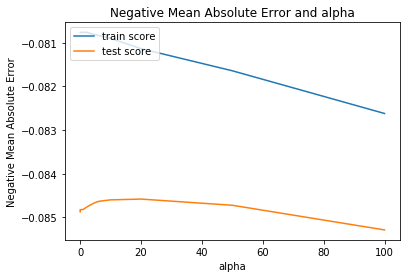

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
# get the best estimators
ridge_model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [70]:
# Check the coefficient with best hyperparameter
alpha = ridge_model_cv.best_estimator_.alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01548282,  0.01930858,  0.08394514,  0.04983065,  0.01512954,
        0.04082749,  0.04644132,  0.01842783,  0.11697889,  0.02494656,
        0.02078719,  0.03510363,  0.02636078, -0.05727594,  0.04888687,
        0.0202028 ,  0.07095974,  0.03696279,  0.02108297,  0.02129323,
        0.02093869,  0.00069454,  0.01453752,  0.01824766,  0.00044259])

In [71]:
# Check the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))


0.013680467067627499

In [72]:
# model with optimal alpha
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9111418853700222
0.9018134722128647


In [73]:
# Ridge model parameters

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            LotFrontage        0.015
1                LotArea        0.019
2            OverallQual        0.084
3            OverallCond        0.050
4           BsmtExposure        0.015
5             BsmtFinSF1        0.041
6            TotalBsmtSF        0.046
7              HeatingQC        0.018
8              GrLivArea        0.117
9            KitchenQual        0.025
10           FireplaceQu        0.021
11            GarageCars        0.035
12         SaleCondition        0.026
13                   Age       -0.057
14           MSZoning_FV        0.049
15           MSZoning_RH        0.020
16           MSZoning_RL        0.071
17           MSZoning_RM        0.037
18  Neighborhood_Crawfor        0.021
19      Foundation_PConc        0.021
20     GarageType_Attchd        0.021
21    GarageType_Basment        0.001
22    GarageType_BuiltIn        0.015
23     GarageType_Detchd        0.018
24  GarageType_No Garage        0.000

### Lasso

In [74]:
# Lasso with multiple alphas
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [75]:
# Constructing the dataframe
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003391      0.001017         0.000798        0.000399      0.0001   
1       0.002992      0.000001         0.000798        0.000399      0.0002   
2       0.002792      0.000399         0.000798        0.000399      0.0003   
3       0.003590      0.000797         0.000798        0.000399      0.0004   
4       0.003390      0.000488         0.000997        0.000631      0.0005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088708          -0.088343          -0.088242   
1  {'alpha': 0.0002}          -0.089102          -0.088344          -0.087701   
2  {'alpha': 0.0003}          -0.089478          -0.088352          -0.087161   
3  {'alpha': 0.0004}          -0.089847          -0.088326          -0.086631   
4  {'alpha': 0.0005}          -0.090227          -0.088277          -0.086108   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.080675          -0.078481        -0.084890        0.004395   
1          -0.080701          -0.078632        -0.084896        0.004343   
2          -0.080667          -0.078721        -0.084876        0.004338   
3          -0.080621          -0.078818        -0.084848        0.004347   
4          -0.080553          -0.078883        -0.084810        0.004389   

   rank_test_score  split0_train_score  split1_train_score  \
0                8           -0.079991           -0.079795   
1                9           -0.080006           -0.079795   
2                7           -0.080016           -0.079815   
3                6           -0.080028           -0.079817   
4                5           -0.080047           -0.079804   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.080152           -0.081709           -0.082143   
1           -0.080197           -0.081723           -0.082130   
2           -0.080318           -0.081738           -0.082141   
3           -0.080443           -0.081754           -0.082172   
4           -0.080570           -0.081777           -0.082203   

   mean_train_score  std_train_score  
0         -0.080758         0.000970  
1         -0.080770         0.000961  
2         -0.080805         0.000948  
3         -0.080843         0.000946  
4         -0.080880         0.000949

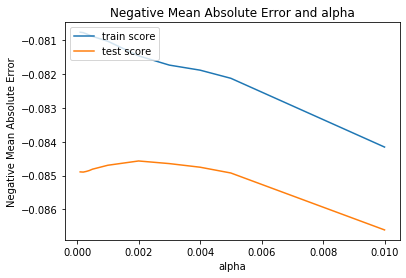

In [76]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
# get the best estimator 
lasso_model_cv.best_estimator_

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
# check the coefficient values with best hyperparameter alpha and check the coefficients

alpha = lasso_model_cv.best_estimator_.alpha
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01341266,  0.01734041,  0.08887404,  0.0504312 ,  0.01302853,
        0.04058948,  0.04565558,  0.0174347 ,  0.11960409,  0.02391262,
        0.0193691 ,  0.03427644,  0.02684284, -0.05990137,  0.02617735,
        0.0073884 ,  0.03055649,  0.        ,  0.01965404,  0.01935118,
        0.        , -0.00215089,  0.00282038,  0.        , -0.00728304])

In [79]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.013606263982066017

In [80]:
# model with optimal alpha
# lasso regression
# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.908268258802267
0.9023460376060166


In [81]:
# lasso model parameters

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            LotFrontage        0.013
1                LotArea        0.017
2            OverallQual        0.089
3            OverallCond        0.050
4           BsmtExposure        0.013
5             BsmtFinSF1        0.041
6            TotalBsmtSF        0.046
7              HeatingQC        0.017
8              GrLivArea        0.120
9            KitchenQual        0.024
10           FireplaceQu        0.019
11            GarageCars        0.034
12         SaleCondition        0.027
13                   Age       -0.060
14           MSZoning_FV        0.026
15           MSZoning_RH        0.007
16           MSZoning_RL        0.031
17           MSZoning_RM        0.000
18  Neighborhood_Crawfor        0.020
19      Foundation_PConc        0.019
20     GarageType_Attchd        0.000
21    GarageType_Basment       -0.002
22    GarageType_BuiltIn        0.003
23     GarageType_Detchd        0.000
24  GarageType_No Garage       -0.007

## Subjective Question

### Question 1:

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

  -> The optimal value of alpha in ridge and lasso :
    - Ridge: 20
    giving an accuracy with r2square value for train and test dataset respectively as:
    - 0.9111418853700222
    - 0.9018134722128647
    
    - Lasso: 0.002
    giving an accuracy with r2square value for train and test dataset respectively as:
    - 0.908268258802267
    - 0.9023460376060166

In [82]:
# After doubling the alpha value in ridge model
# Ridge regression

ridge1= Ridge(alpha= 40)

ridge1.fit(X_train, y_train)
ridge1.coef_

# predict
y_train_pred_double = ridge1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = ridge1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))


0.909897335403902
0.9019212250111833


There is a slight decrease in train and test scores r2square values after we double the hyperparameter from 20 to 40

In [83]:
# Check the mean squared error
mean_squared_error(y_test, ridge1.predict(X_test))

0.013665453718626716

In [84]:
# Ridge model parameters

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge1.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            LotFrontage        0.015
1                LotArea        0.020
2            OverallQual        0.084
3            OverallCond        0.049
4           BsmtExposure        0.015
5             BsmtFinSF1        0.040
6            TotalBsmtSF        0.046
7              HeatingQC        0.019
8              GrLivArea        0.114
9            KitchenQual        0.026
10           FireplaceQu        0.021
11            GarageCars        0.036
12         SaleCondition        0.027
13                   Age       -0.055
14           MSZoning_FV        0.039
15           MSZoning_RH        0.015
16           MSZoning_RL        0.052
17           MSZoning_RM        0.021
18  Neighborhood_Crawfor        0.021
19      Foundation_PConc        0.022
20     GarageType_Attchd        0.015
21    GarageType_Basment       -0.001
22    GarageType_BuiltIn        0.012
23     GarageType_Detchd        0.011
24  GarageType_No Garage       -0.003

The most important predictor variables after implementation of the changes in ridge hyperparameter(alpha) are: 
'GrLivArea','OverallQual','MSZoning_RL','OverallCond','TotalBsmtSF'

In [85]:
# After doubling the value of alpha in lasso
lasso_2 = Lasso()

# list of alphas

params = {'alpha': [0.004]}

# cross validation

folds = 5
lasso_model_cv_double = GridSearchCV(estimator = lasso_2,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_double.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.004]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [86]:
# finding parameters after we use the double the value of the hyperparameter
lasso_cv_results_double = pd.DataFrame(lasso_model_cv_double.cv_results_)
lasso_cv_results_double[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.004          -0.08188        -0.084751                1

In [87]:
# finding the best estimator
lasso_model_cv_double.best_estimator_

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
# model with double the optimal alpha value
# check the coefficient values with lambda = 0.004

alpha = lasso_model_cv_double.best_estimator_.alpha

lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train, y_train) 
lasso1.coef_

# predict
y_train_pred_L1 = lasso1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_L1))
y_test_pred_L1 = lasso1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_L1))

0.9071641922758297
0.902259816216919


There is a minute decrease in train and test scores r2square values after we double the hyperparameter from 0.002 to 0.004

In [89]:
# lasso model parameters

lasso_df_double = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso1.coef_.round(3)})
lasso_df_double.reset_index(drop=True, inplace=True)
lasso_df_double

Features  Coefficient
0            LotFrontage        0.013
1                LotArea        0.017
2            OverallQual        0.091
3            OverallCond        0.048
4           BsmtExposure        0.011
5             BsmtFinSF1        0.040
6            TotalBsmtSF        0.045
7              HeatingQC        0.017
8              GrLivArea        0.119
9            KitchenQual        0.025
10           FireplaceQu        0.018
11            GarageCars        0.035
12         SaleCondition        0.026
13                   Age       -0.060
14           MSZoning_FV        0.022
15           MSZoning_RH        0.004
16           MSZoning_RL        0.027
17           MSZoning_RM       -0.000
18  Neighborhood_Crawfor        0.018
19      Foundation_PConc        0.017
20     GarageType_Attchd        0.000
21    GarageType_Basment       -0.000
22    GarageType_BuiltIn        0.001
23     GarageType_Detchd       -0.000
24  GarageType_No Garage       -0.005

The most important predictor variables after implementation of the changes in lasso hyperparameter(alpha) are: 

'GrLivArea','OverallQual','OverallCond','TotalBsmtSF','BsmtFinSF1'

We observe a minute change in r2square value when the alpha value is doubled for both ridge and lasso.


### Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [90]:
# Lasso with multiple alphas and cross validation after removing 5 variables
lasso_20 = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds=5
X_train1 = X_train.drop(['GrLivArea','OverallQual','OverallCond','TotalBsmtSF','BsmtFinSF1'],axis=1)
lasso_model_cv1 = GridSearchCV(estimator = lasso_20, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv1.fit(X_train1, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [91]:
# Constructing the data frame
cv_results1 = pd.DataFrame(lasso_model_cv1.cv_results_)
cv_results1.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003989      0.000631         0.001197        0.000399      0.0001   
1       0.002992      0.000892         0.000599        0.000489      0.0002   
2       0.002793      0.000747         0.000798        0.000399      0.0003   
3       0.003006      0.000028         0.000000        0.000000      0.0004   
4       0.002183      0.000382         0.001005        0.000015      0.0005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.157618          -0.133500          -0.146947   
1  {'alpha': 0.0002}          -0.157691          -0.133756          -0.146720   
2  {'alpha': 0.0003}          -0.157761          -0.133799          -0.146494   
3  {'alpha': 0.0004}          -0.157786          -0.133841          -0.146267   
4  {'alpha': 0.0005}          -0.157778          -0.133884          -0.146041   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.146657          -0.134378        -0.143820        0.008987   
1          -0.146778          -0.134427        -0.143875        0.008934   
2          -0.146875          -0.134477        -0.143881        0.008928   
3          -0.146974          -0.134529        -0.143880        0.008909   
4          -0.146980          -0.134568        -0.143850        0.008878   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.136407           -0.141124   
1                4           -0.136439           -0.141115   
2                6           -0.136462           -0.141108   
3                5           -0.136455           -0.141100   
4                3           -0.136444           -0.141093   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.137082           -0.137610           -0.140394   
1           -0.137139           -0.137649           -0.140419   
2           -0.137204           -0.137661           -0.140473   
3           -0.137289           -0.137688           -0.140533   
4           -0.137380           -0.137709           -0.140548   

   mean_train_score  std_train_score  
0         -0.138524         0.001879  
1         -0.138552         0.001862  
2         -0.138581         0.001854  
3         -0.138613         0.001851  
4         -0.138635         0.001840

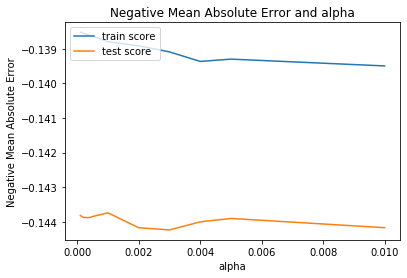

In [92]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
# get the best estimator for lambda
lasso_model_cv1.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
# check the coefficient values with best lambda
alpha = lasso_model_cv1.best_estimator_.alpha
lasso20 = Lasso(alpha=alpha)      
lasso20.fit(X_train1, y_train) 
lasso20.coef_

array([ 0.01610188,  0.05296675,  0.03524061,  0.03704524,  0.09011394,
        0.06143541,  0.10363312,  0.02707676, -0.03137422,  0.08681247,
        0.05020318,  0.12810767,  0.09625145,  0.03575894,  0.01929075,
        0.04211117, -0.00369971,  0.02732349,  0.        ,  0.01625672])

In [95]:
# lasso model parameters

lasso_df1 = pd.DataFrame({'Features':X_train1.columns, 'Coefficient':lasso20.coef_.round(3)})
lasso_df1.reset_index(drop=True, inplace=True)
lasso_df1

Features  Coefficient
0            LotFrontage        0.016
1                LotArea        0.053
2           BsmtExposure        0.035
3              HeatingQC        0.037
4            KitchenQual        0.090
5            FireplaceQu        0.061
6             GarageCars        0.104
7          SaleCondition        0.027
8                    Age       -0.031
9            MSZoning_FV        0.087
10           MSZoning_RH        0.050
11           MSZoning_RL        0.128
12           MSZoning_RM        0.096
13  Neighborhood_Crawfor        0.036
14      Foundation_PConc        0.019
15     GarageType_Attchd        0.042
16    GarageType_Basment       -0.004
17    GarageType_BuiltIn        0.027
18     GarageType_Detchd        0.000
19  GarageType_No Garage        0.016

the five most important predictor variables now are:
    - MSZoning_RL
    - GarageCars
    - MSZoning_RM
    - KitchenQual
    - MSZoning_FV